<h3><b><centre>Machine Model Performance Analysis with Python and SQL</centre></b></h3>

In [12]:
#connection to sql server
import pyodbc

#sql server connection details
conn_str = (
               "DRIVER={ODBC Driver 17 for SQL Server};" 
               "SERVER= VALERIE-DESKTOP\SQLEXPRESS01;"
               "DATABASE=psq;"
               "Trusted_Connection=yes;"
)

conn = pyodbc.connect(conn_str)
print("Connection Successful")
               

Connection Successful


In [13]:
#Execute sql query
cursor = conn.cursor()
select_query = 'Select * From machine' #select query 

#execute query
cursor.execute(select_query)

#fetch all rows
rows = cursor.fetchall()

#iterate through all the rows
for row in rows:
    print(row)


('adviser', '32/60', 125, 256, 6000, 256, 16, 128, 198, 199)
('amdahl', '470v/7', 29, 8000, 32000, 32, 8, 32, 269, 253)
('amdahl', '470v/7a', 29, 8000, 32000, 32, 8, 32, 220, 253)
('amdahl', '470v/7b', 29, 8000, 32000, 32, 8, 32, 172, 253)
('amdahl', '470v/7c', 29, 8000, 16000, 32, 8, 16, 132, 132)
('amdahl', '470v/b', 26, 8000, 32000, 64, 8, 32, 318, 290)
('amdahl', '580-5840', 23, 16000, 32000, 64, 16, 32, 367, 381)
('amdahl', '580-5850', 23, 16000, 32000, 64, 16, 32, 489, 381)
('amdahl', '580-5860', 23, 16000, 64000, 64, 16, 32, 636, 749)
('amdahl', '580-5880', 23, 32000, 64000, 128, 32, 64, 1144, 1238)
('apollo', 'dn320', 400, 1000, 3000, 0, 1, 2, 38, 23)
('apollo', 'dn420', 400, 512, 3500, 4, 1, 6, 40, 24)
('basf', '7/65', 60, 2000, 8000, 65, 1, 8, 92, 70)
('basf', '7/68', 50, 4000, 16000, 65, 1, 8, 138, 117)
('bti', '5000', 350, 64, 64, 0, 1, 4, 10, 15)
('bti', '8000', 200, 512, 16000, 0, 4, 32, 35, 64)
('burroughs', 'b1955', 167, 524, 2000, 8, 4, 15, 19, 23)
('burroughs', 'b2900

<b>Create Datafrane from sql query results</b>

In [14]:
# Create a DataFrame using pandas
import pandas as pd
df = pd.DataFrame.from_records(rows)

<b>Explore Data</b>

In [15]:
#display first 5 rows of dataset
df.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [16]:
#rename column
column = df.rename(columns={0:'vendor_name', 1:'model_name', 2:'MYCT', 3:'MMIN', 4:'MMAX', 5:'Cache', 6:'CHMIN', 7:'CHMAX', 8:'PRP', 9:'ERP'}, inplace=True)

In [17]:
#display dataset to check reflected change of column name
df.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,Cache,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [18]:
#numerical data statistics
df.describe()

,MYCT,MMIN,MMAX,Cache,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [19]:
#check for missing valus
df.isna().sum()
cl = list(df.columns) #display column names as a kist
print(cl)

['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'Cache', 'CHMIN', 'CHMAX', 'PRP', 'ERP']


<b>Performance Accuracy; Difference between PRP and ERP

In [20]:
query= 'Select PRP, ERP, (PRP - ERP) as PAccuracy, vendor_name, model_name, MYCT, MMAX, MMIN, Cache FROM machine where (PRP - ERP)> 0 order by PAccuracy;' #performance query
cursor.execute(query) #execute query

rows = cursor.fetchall() #return all rows in query

for row in rows: #iterate through all rows and display results
    print(row)

(29, 28, 1, 'honeywell', 'dps:7/55', 140, 4000, 2000, 0)
(66, 65, 1, 'ibm', '4361-5', 25, 12000, 2000, 16)
(45, 44, 1, 'ipl', '4443', 50, 8000, 2000, 8)
(25, 24, 1, 'perkin-elmer', '3205', 250, 4000, 512, 0)
(22, 20, 2, 'hp', '3000/iii', 175, 2000, 256, 0)
(34, 31, 3, 'ibm', '4341-10', 225, 4000, 2000, 8)
(35, 32, 3, 'honeywell', 'dps:8/44', 140, 4000, 2000, 8)
(53, 50, 3, 'harris', '700', 300, 12000, 384, 6)
(24, 21, 3, 'ibm', '370/148', 203, 2000, 1000, 0)
(32, 28, 4, 'ibm', '38/7', 400, 4000, 2000, 0)
(50, 46, 4, 'nas', 'as/3000', 115, 8000, 2000, 16)
(32, 28, 4, 'hp', '3000/44', 105, 4000, 1000, 0)
(40, 36, 4, 'dec', 'vax:11/750', 320, 8000, 512, 4)
(60, 56, 4, 'dg', 'eclipse:mv/8000', 110, 12000, 1000, 16)
(25, 21, 4, 'nixdorf', '8890/30', 200, 2000, 1000, 0)
(30, 25, 5, 'nixdorf', '8890/50', 200, 4000, 1000, 0)
(30, 25, 5, 'prime', '50-2250', 160, 4000, 512, 2)
(42, 37, 5, 'sperry', '80/8', 124, 8000, 1000, 0)
(24, 19, 5, 'dg', 'eclipse:m/600', 700, 2000, 256, 0)
(33, 28, 5, 'c.r

In [21]:
performance = pd.DataFrame.from_records(rows) #create dataframe from performance query result 

column=performance.rename(columns={0:'PRP', 1:'ERP', 2:'PAccuracy', 3:'vendor_name', 4:'model_name', 5:'MYCT', 6:'MMAX', 7:'MMIN', 8:'Cache'}, inplace=True) #rename performance query columns
performance.head()

,PRP,ERP,PAccuracy,vendor_name,model_name,MYCT,MMAX,MMIN,Cache
0,29,28,1,honeywell,dps:7/55,140,4000,2000,0
1,66,65,1,ibm,4361-5,25,12000,2000,16
2,45,44,1,ipl,4443,50,8000,2000,8
3,25,24,1,perkin-elmer,3205,250,4000,512,0
4,22,20,2,hp,3000/iii,175,2000,256,0


<b>Exploratory Data Visualization</b>

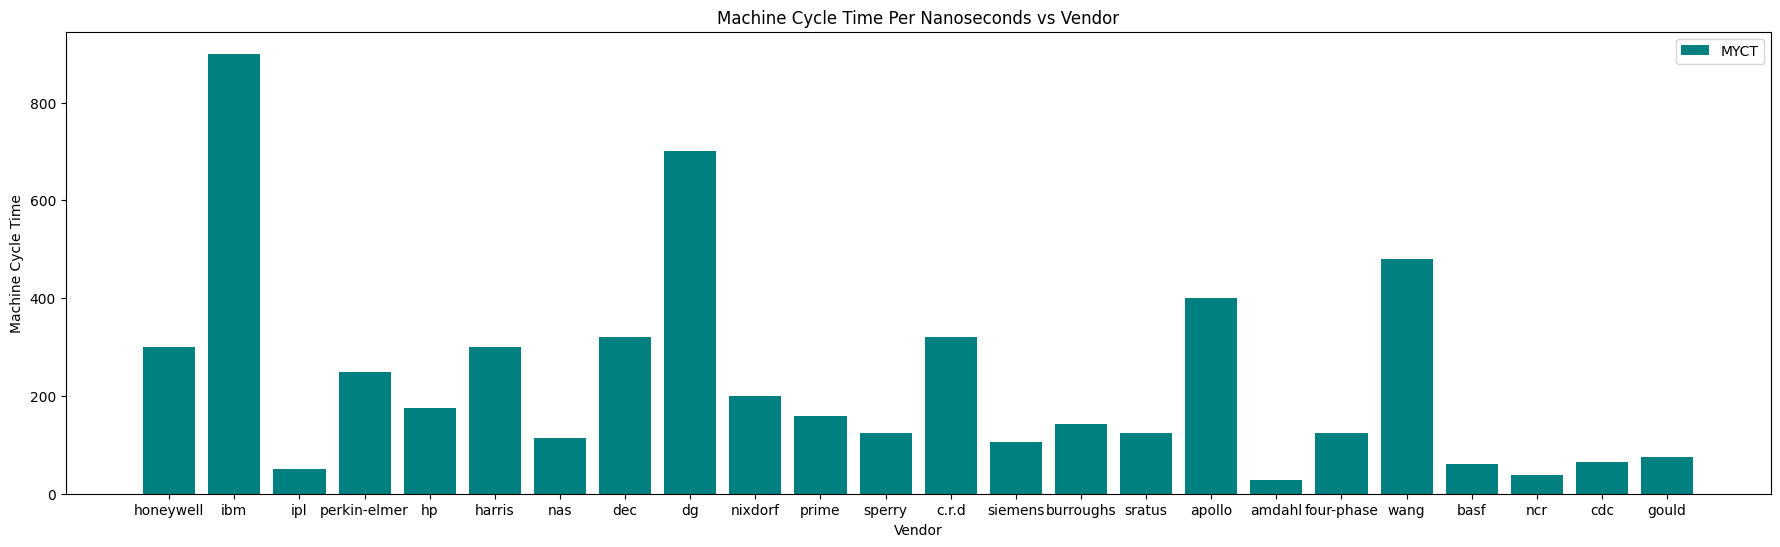

In [22]:
#import data visualization library
import matplotlib.pyplot as plt

#size of figure
plt.figure(figsize=(22,6))

# plot bar chart
plt.bar(performance['vendor_name'], performance['MYCT'], label='MYCT', color='#008080')

#Labels
plt.title('Machine Cycle Time Per Nanoseconds vs Vendor')
plt.xlabel('Vendor')
plt.ylabel('Machine Cycle Time')
plt.legend()


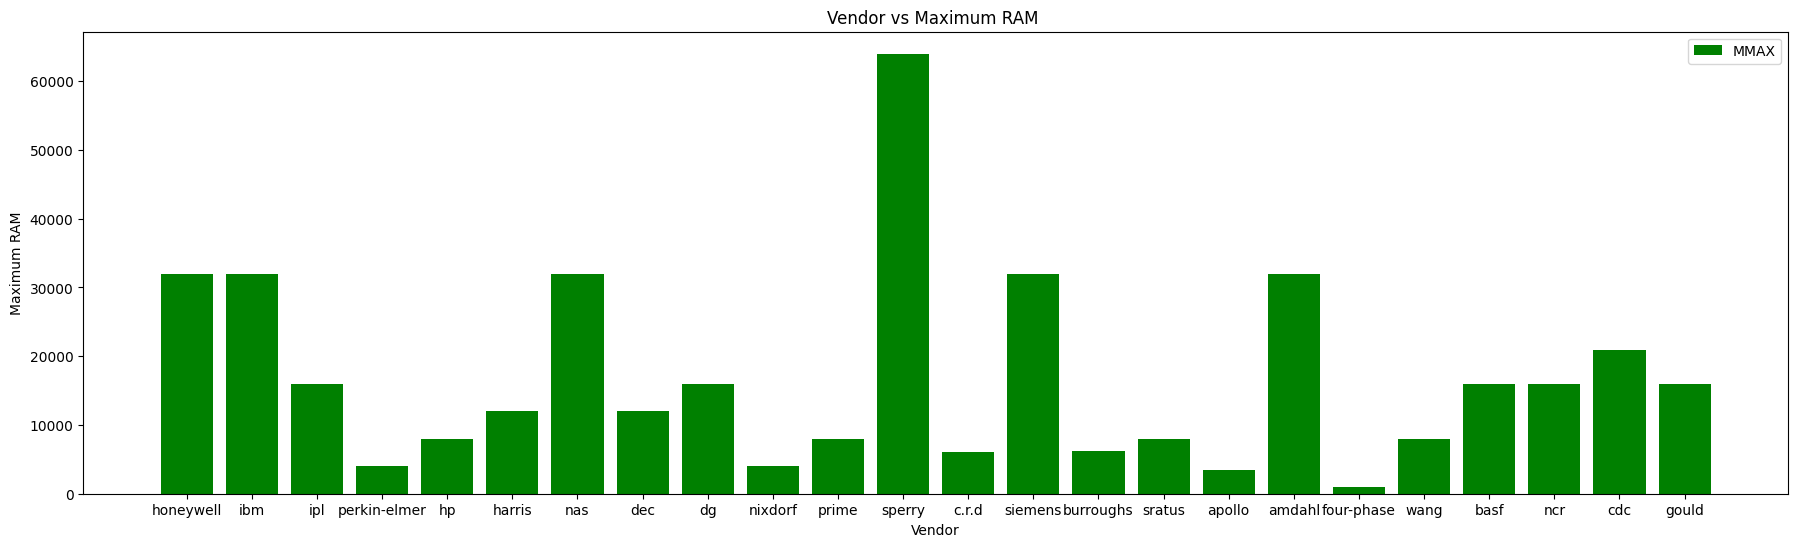

In [23]:
import matplotlib.pyplot as plt
#size of figure
plt.figure(figsize=(22,6))
# Plot bar chart
plt.bar(performance['vendor_name'], performance['MMAX'], label='MMAX', color='g')

#labels
plt.title('Vendor vs Maximum RAM ')
plt.xlabel('Vendor')
plt.ylabel('Maximum RAM')
plt.legend()

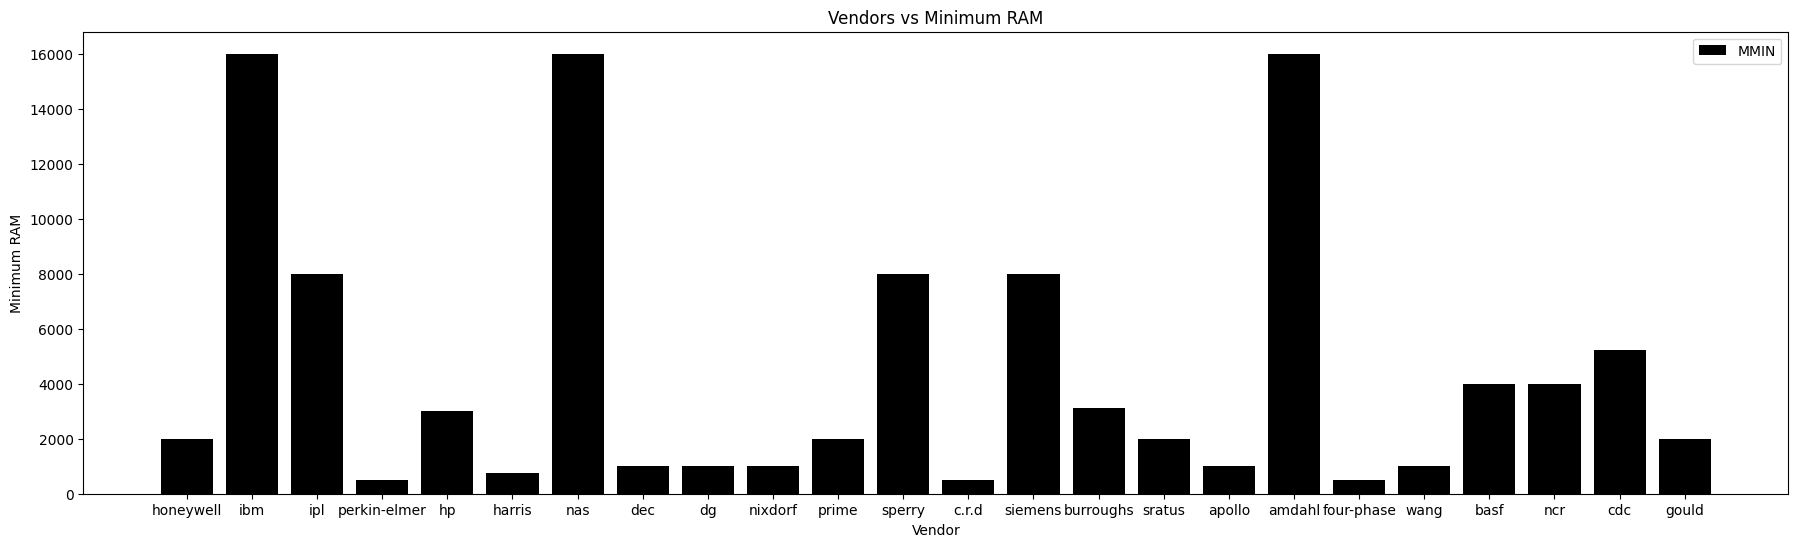

In [30]:
#size of figure
plt.figure(figsize=(22,6))

#plot bar chart
plt.bar(performance['vendor_name'], performance['MMIN'], label='MMIN', color='black')

#labels
plt.title('Vendors vs Minimum RAM')
plt.xlabel('Vendor')
plt.ylabel('Minimum RAM')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


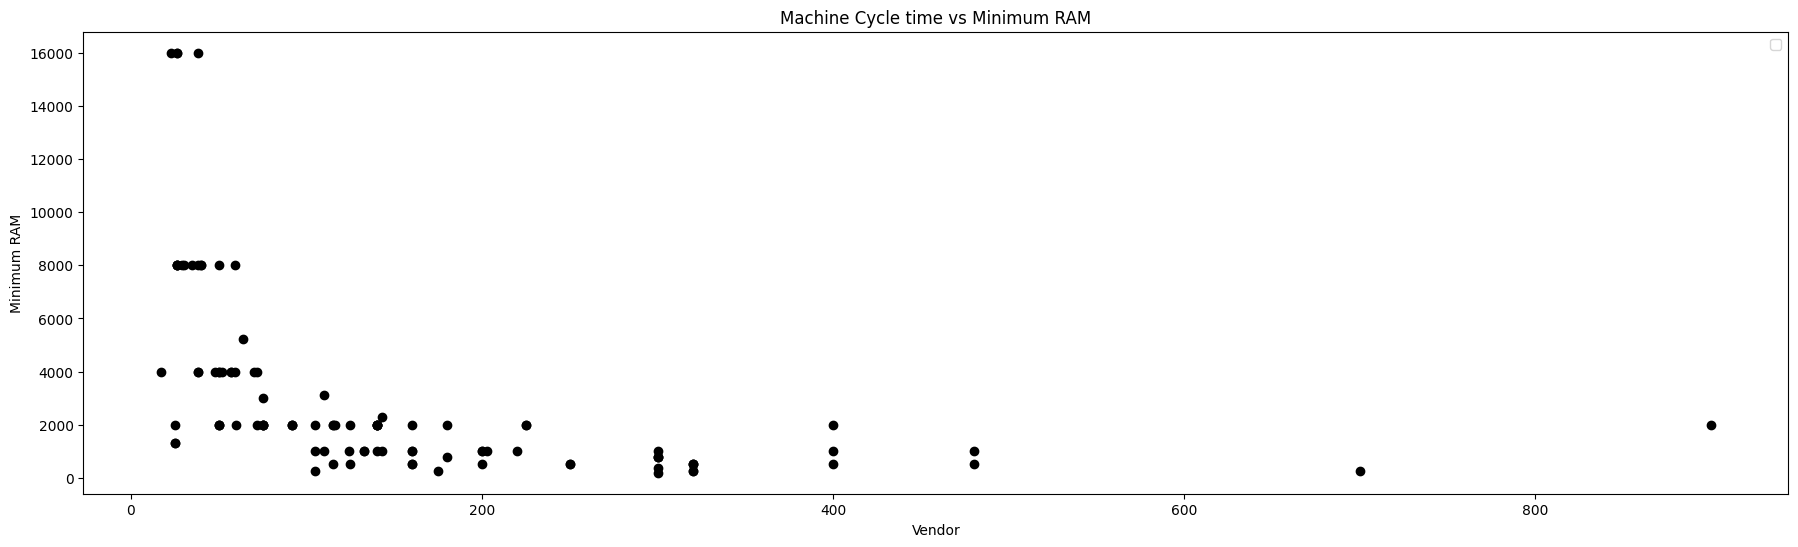

In [25]:
#size of figure
plt.figure(figsize=(22,6))

#scatter plot
plt.scatter(performance['MYCT'], performance['MMIN'], color='black')

#labels
plt.title('Machine Cycle time vs Minimum RAM')
plt.xlabel('Vendor')
plt.ylabel('Minimum RAM')
plt.legend()

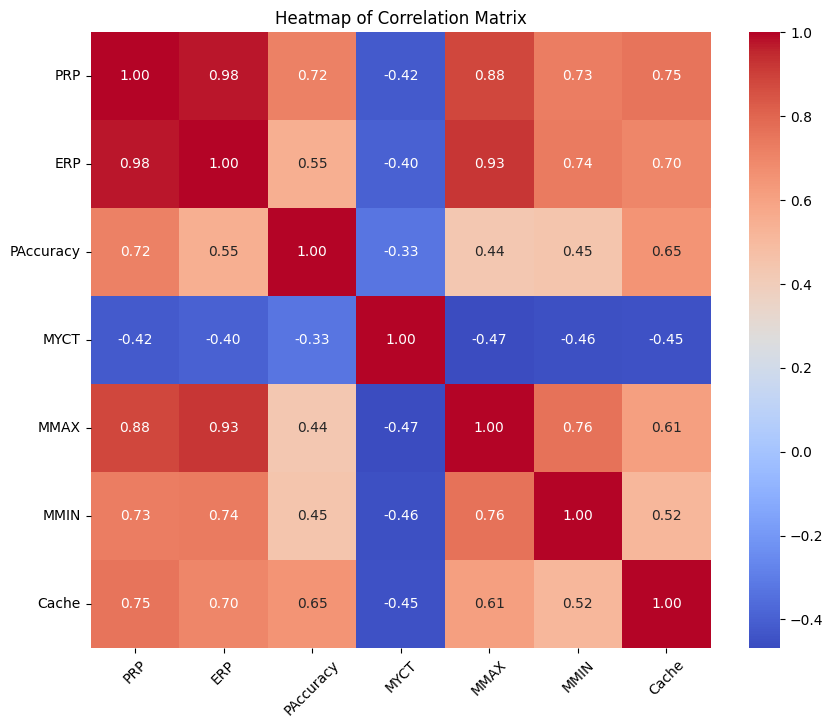

In [26]:
#import data visualization library
import seaborn as sns # type: ignore

numeric_df = performance.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Adding titles and labels
plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Close the cursor and connection when done
cursor.close()
conn.close()
print("Connection Closed")